**US Accidnets Exploratory Data Analysis** <br/>
Dataset link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


In [1]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [4]:
! kaggle datasets download sobhanmoosavi/us-accidents

 96% 259M/269M [00:03<00:00, 76.3MB/s]
100% 269M/269M [00:03<00:00, 80.0MB/s]


In [5]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


In [6]:
# ! chmod 600 ~/.kaggle/kaggle.json
# ! cp kaggle.json ~/.kaggle/

**Importing required libraries**

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Data preparation and Cleaning**
* Load the dataset using pandas
* Get overview about the dataset
* Look for any missing values, outliers, or any other data cleaning tasks

In [8]:
#load the dataset
data=pd.read_csv("/content/US_Accidents_Dec21_updated.csv")

In [9]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**Some thoughts on columns:-**
1. There are two columns 'County' and 'Country' as well so check if both are same or not.
2. There are three types of Twilight: "Civil_Twilight", "Nautical_Twilight" and "Astronomical_Twilight". What are they?
3. 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country' :- these are the fields which are similar, so check if there is any redundancy or not.

In [11]:
# creating the two columns, one to store list of features to drop and one to add features that are need to be added
drop_list=[]
feature_list=[]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [13]:
# answering the third one: 
#'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country'
#  these are the fields which are similar, so check if there is any redundancy or not.
data[['Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country']]

,Number,Street,Side,City,County,State,Zipcode,Country
0,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US
1,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US
2,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US
3,NaN,I-77 N,R,Akron,Summit,OH,44311,US
4,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US
...,...,...,...,...,...,...,...,...
2845337,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US
2845338,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US
2845339,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US
2845340,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US


### Number
Shows the street number in address field.

In [14]:
#checking the Number column as we can see so much of nan values
data['Number'].isnull().sum() / len(data)

0.6129003121593116

we can see more than 50% percent values are missing and it is difficult to work with so many missing values. Hence we will drop the column.

In [15]:
drop_list.append('Number')

### Street
Shows the street name in address field.

In [18]:
data['Street'].nunique()

159651

There are so many unique value for street, it will be good to drop this feature. 


In [19]:
drop_list.append('Street')

### Side
Shows the relative side of the street (Right/Left) in address field.

In [20]:
data['Side'].value_counts()

R    2353309
L     492032
N          1
Name: Side, dtype: int64

It shows most of the accidents took place in right side of street. But it would be good to see further this feature with other features. It has one N value which we will remove it. 

In [21]:
# data.drop(data[data.loc['Side']=='N'].index)
data.drop(data.loc[data['Side']=='N'].index,inplace=True)

In [22]:
data['Side'].value_counts()

R    2353309
L     492032
Name: Side, dtype: int64

### City

In [23]:

city_by_accidents = data['City'].value_counts()
data['City'].value_counts()

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

so miami is a city in florida, which is a 3rd most populus state in USA. That could be a reasonable reason why miami has highest no of accidents.

In [24]:
data['City'].nunique()

11681

In [25]:
len(city_by_accidents[city_by_accidents>=10000])
high_accident_city = city_by_accidents[city_by_accidents>=10000]
high_accident_city

Miami              106966
Los Angeles         68956
Orlando             54691
Dallas              41979
Houston             39448
Charlotte           33152
Sacramento          32559
San Diego           26627
Raleigh             22840
Minneapolis         22768
Portland            20944
Nashville           20267
Austin              18301
Baton Rouge         18182
Phoenix             17143
Saint Paul          16869
New Orleans         16251
Atlanta             15622
Jacksonville        14967
Richmond            14349
Tucson              13799
San Jose            13377
Riverside           13310
Kansas City         13298
Bakersfield         12044
San Bernardino      11249
Chicago             11188
Tampa               10984
Salt Lake City      10709
Ontario             10538
Anaheim             10502
Hialeah             10398
Fort Lauderdale     10345
Oakland             10051
Name: City, dtype: int64

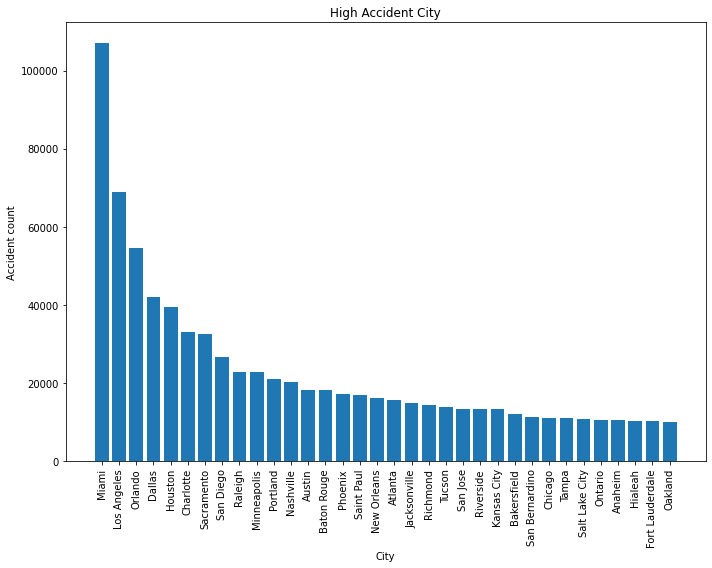

In [32]:
# sns.histplot(high_accident_city)
plt.figure(figsize=(10,8))
plt.bar(high_accident_city.index, high_accident_city)
plt.xticks(rotation=90)
plt.title("High Accident City")
plt.xlabel("City")
plt.ylabel("Accident count")
plt.tight_layout()

1. we can try to find here why miami has such high accident rates.
- is the population only reason?
   * compare the population of miami with other high accident cities.
   * compare miami population with other cities in florida.

* population of miami: 
  * 5,902,000(2016)
  * 6,167,000(2021)
* population of los-angles:
  * 12,383,000(2016)
  * 12,459,000(2021)

* population of Orlando:
  * 1,784,000 (2016)
  * 2,002,000 (2021)

* population of Dallas:
  * 5,846,000 (2016)
  * 6,397,000 (2021)

source: https://www.macrotrends.net/cities/23064/miami/population?q=dallas


We can see that population is not the reason as los angles has highest population but it is second place in cities by accident and it's accident's rate is 40,000 less than miami.

There are other reason then...

In [33]:
#now let's compare population cities of florida
data[data['City']=='Miami'][['City','County', 'State']]['County'].value_counts()

Miami-Dade    106891
Gila              51
Pinal             10
Kanawha            7
Broward            5
Ottawa             2
Name: County, dtype: int64

Miami-Dade is the most dangerous county in florida
source: https://www.laventlaw.com/miami-car-accident-lawyer/statistics/

### County and States
* County:- In the United States, a county is an administrative or political subdivision of a state that consists of a geographic region with specific boundaries.

* There are 50 states in US and around 3000 counties.
* So we will not consider the county but will consider the states.

In [34]:
drop_list.append('County')

In [35]:
data[data['City']=='Miami'][['City','County', 'State']]['State'].value_counts()

FL    106896
AZ        61
WV         7
OK         2
Name: State, dtype: int64

There are places named as "miami" in other states also but most of the accidents are recorded from "florida". So we will consider the miami of florida only.

In [36]:
#collecting the accident report of florida state
florida_state = data[data['State']=='FL']

In [37]:
len(florida_state)

401388

In [38]:
florida_state['County'].value_counts()

Miami-Dade      143939
Orange           60566
Broward          21217
Hillsborough     19328
Pinellas         15775
                 ...  
Gulf                38
Franklin            24
Lafayette           23
Saint Johns         15
De Soto              8
Name: County, Length: 69, dtype: int64

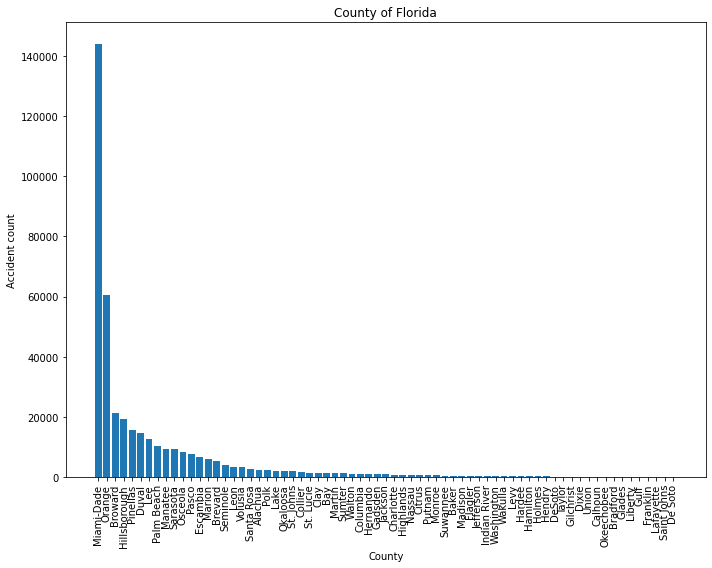

In [41]:
plt.figure(figsize=(10,8))
plt.bar(florida_state['County'].value_counts().keys(), florida_state['County'].value_counts())
plt.xticks(rotation=90)
plt.title("County of Florida")
plt.xlabel("County")
plt.ylabel("Accident count")
plt.tight_layout()

Miami-Dade has the highest accident count in Florida state.

**One of the reason:** Drivers often become impatient and aggressive when faced with Miami’s congested roads and bumper-to-bumper traffic. 
Source: https://www.laventlaw.com/miami-car-accident-lawyer/statistics/

### Accident count in state

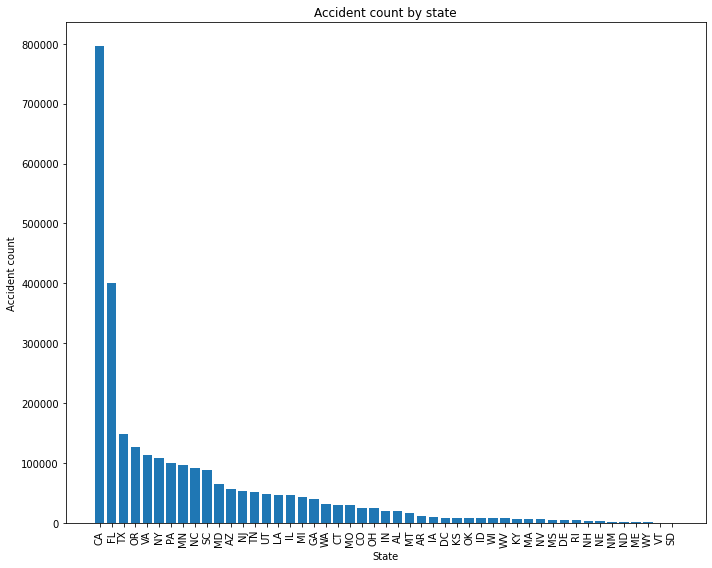

In [45]:
plt.figure(figsize=(10,8))
plt.bar(data['State'].value_counts().keys(), data['State'].value_counts())
plt.xticks(rotation=90)
plt.title("Accident count by state")
plt.xlabel("State")
plt.ylabel("Accident count")
plt.tight_layout()

CANADA ranks 1 in highest accident state in USA. And it is also the most populous state in USA.

In [42]:
#now just consider miami city in florida
miami_florida=florida_state[florida_state['City']=='Miami']

In [43]:
miami_florida.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
31596,A-31597,2,2016-11-30 16:35:52,2016-11-30 22:35:52,25.78601,-80.25809,25.78336,-80.26911,0.710,At SR-953/42nd Ave/Le Jeune Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
31660,A-31661,2,2016-11-30 18:35:52,2016-12-01 00:35:52,25.66214,-80.38860,25.65292,-80.38712,0.644,At 120th St/Exit 19 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
31734,A-31735,2,2016-12-01 05:51:51,2016-12-01 11:51:51,25.97053,-80.16576,25.95995,-80.16870,0.753,At Ives Dairy Rd/203rd St/Exit 16 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
31735,A-31736,3,2016-12-01 06:03:23,2016-12-01 12:03:23,25.78447,-80.29346,25.78488,-80.28444,0.562,At SR-959/Red Rd - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
31805,A-31806,2,2016-12-01 08:21:46,2016-12-01 14:21:46,25.91310,-80.21024,25.90780,-80.21023,0.366,At 151st St/Exit 11 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


1. Severity

In [33]:
miami_florida.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [34]:
miami_florida['Severity'].value_counts()

2    102903
3      2376
4      1565
1        52
Name: Severity, dtype: int64

severity is not that high.

### Extracting week and Hour from datetime columns

In [35]:
#now let's see at what time most accidents happen?
#for this we use "Start_Time" feature
pd.to_datetime(miami_florida['Start_Time']).dt.time
miami_florida['hour']=pd.to_datetime(miami_florida['Start_Time']).dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
hour_list=list(miami_florida['hour'].value_counts().keys())
hourly_accident=list(miami_florida['hour'].value_counts())

Text(0, 0.5, 'accident count')

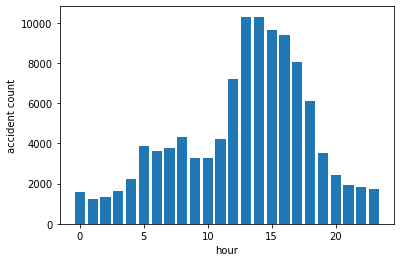

In [37]:
plt.bar(hour_list,hourly_accident)
plt.xlabel("hour")
plt.ylabel("accident count")

We can see that peak hours are around 1 or 2 p.m and most of the accidents happens in afternoon to evening time period.

In [38]:
#noew let's get the weekdays and analyse accidents weekly
miami_florida['week']=pd.to_datetime(miami_florida['Start_Time']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'accident count')

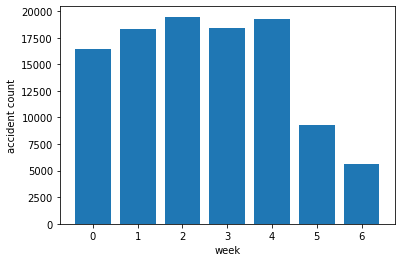

In [39]:
week_list=list(miami_florida['week'].value_counts().keys())
acc_by_week=list(miami_florida['week'].value_counts())
plt.bar(week_list, acc_by_week)
plt.xlabel("week")
plt.ylabel("accident count")

Wed and Fri are peak week days for accident.
* Monday to Sunday: 0-6

Text(0, 0.5, 'accident count')

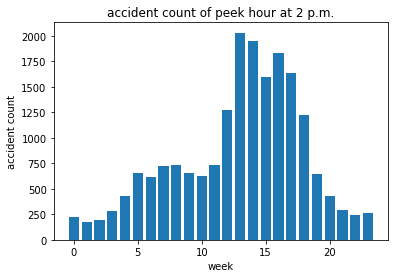

In [40]:
#now let's find on these peek days what is the hour of accident
week_list=miami_florida[miami_florida['week']==2]['hour'].value_counts().keys()
acc_by_week= miami_florida[miami_florida['week']==2]['hour'].value_counts()
plt.bar(week_list, acc_by_week)
plt.title("accident count of peek hour at 2 p.m.")
plt.xlabel("week")
plt.ylabel("accident count")

peak hour is same for week 2

### Extracting year from datetime column

In [114]:
pd.to_datetime(miami_florida['Start_Time']).dt.year
miami_florida['Year']=pd.to_datetime(miami_florida['Start_Time']).dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Accident by Year in Miami,Florida')

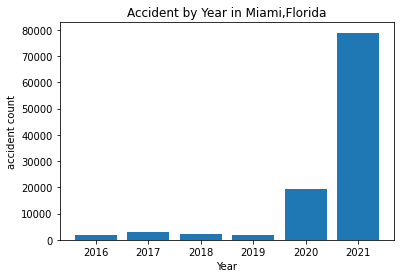

In [116]:
plt.bar(miami_florida['Year'].value_counts().keys(), miami_florida['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel("accident count")
plt.title("Accident by Year in Miami,Florida")

Text(0.5, 1.0, 'Accident by Year in USA')

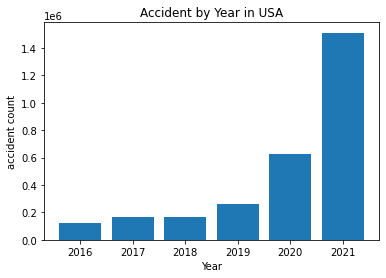

In [122]:
data['Year']=pd.to_datetime(data['Start_Time']).dt.year
plt.bar(data['Year'].value_counts().keys(), data['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel("accident count")
plt.title("Accident by Year in USA")

**Obs:** Before pandemic, the accidents were very low but as soon as effect of pandemic going down, accident is getting high. Strange!! Surprisingly **2021 was the deadliest year in whole USA and in Miami also.**

### Extracting month

In [118]:
pd.to_datetime(miami_florida['Start_Time']).dt.month
miami_florida['Month']=pd.to_datetime(miami_florida['Start_Time']).dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Accident by Month in Miami,Florida')

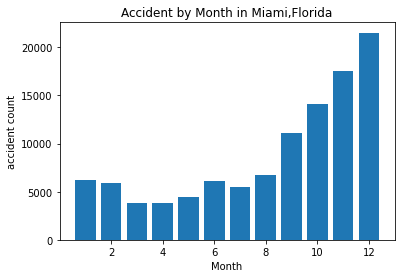

In [119]:
plt.bar(miami_florida['Month'].value_counts().keys(), miami_florida['Month'].value_counts())
plt.xlabel('Month')
plt.ylabel("accident count")
plt.title("Accident by Month in Miami,Florida")

In [120]:
data['Month']=pd.to_datetime(data['Start_Time']).dt.month

Text(0.5, 1.0, 'Accident by Month in USA')

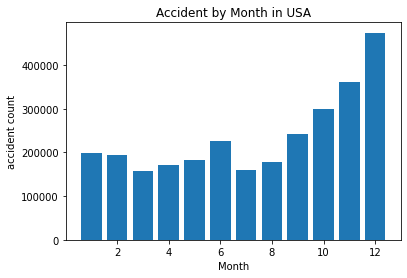

In [121]:
plt.bar(data['Month'].value_counts().keys(), data['Month'].value_counts())
plt.xlabel('Month')
plt.ylabel("accident count")
plt.title("Accident by Month in USA")

In [41]:
miami_florida.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'hour', 'week'],
      dtype='object')

In [42]:
#to better view about the data
#let's plot correlation matrix
miami_florida.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,hour,week
Severity,1.000000,0.104496,0.122909,0.105753,0.121903,0.093915,-0.034496,-0.009886,0.010341,0.038514,...,0.019772,-0.008904,-0.003148,-0.070889,-0.014700,-0.003815,-0.027311,NaN,-0.066502,0.015518
Start_Lat,0.104496,1.000000,0.813400,0.994534,0.811874,0.161797,-0.363367,-0.053484,-0.057234,0.025326,...,0.003601,0.046216,0.006435,0.043750,0.023011,0.001874,-0.043204,NaN,-0.028850,-0.000334
Start_Lng,0.122909,0.813400,1.000000,0.812348,0.998094,0.187089,-0.366808,-0.054522,-0.059403,0.026993,...,0.023036,0.053209,0.004171,0.049990,0.043035,0.013076,-0.031283,NaN,-0.030816,0.009109
End_Lat,0.105753,0.994534,0.812348,1.000000,0.811444,0.179728,-0.362866,-0.052740,-0.056473,0.024810,...,0.003624,0.046375,0.006359,0.043718,0.023002,0.001991,-0.043687,NaN,-0.026345,-0.000093
End_Lng,0.121903,0.811874,0.998094,0.811444,1.000000,0.187575,-0.366477,-0.055632,-0.060681,0.028203,...,0.023255,0.051812,0.004051,0.049899,0.044486,0.013161,-0.031765,NaN,-0.033844,0.009731
Distance(mi),0.093915,0.161797,0.187089,0.179728,0.187575,1.000000,0.007499,-0.005423,-0.002109,0.050537,...,-0.000554,-0.011965,-0.006498,-0.105252,-0.019162,-0.007865,-0.084376,NaN,-0.041732,0.012293
Number,-0.034496,-0.363367,-0.366808,-0.362866,-0.366477,0.007499,1.000000,-0.012541,-0.014379,-0.011463,...,0.012707,-0.071947,-0.005811,-0.091841,-0.050712,-0.019931,-0.003539,NaN,-0.005660,0.035932
Temperature(F),-0.009886,-0.053484,-0.054522,-0.052740,-0.055632,-0.005423,-0.012541,1.000000,0.999833,-0.258200,...,-0.003987,-0.002779,-0.005346,0.013713,0.011377,0.003106,-0.049264,NaN,0.237467,-0.009146
Wind_Chill(F),0.010341,-0.057234,-0.059403,-0.056473,-0.060681,-0.002109,-0.014379,0.999833,1.000000,-0.258854,...,-0.006816,-0.002911,-0.005467,0.014898,0.012345,0.003308,-0.059348,NaN,0.237562,-0.003837
Humidity(%),0.038514,0.025326,0.026993,0.024810,0.028203,0.050537,-0.011463,-0.258200,-0.258854,1.000000,...,0.002690,-0.014108,0.007023,-0.031304,-0.001907,0.004566,0.021805,NaN,-0.265631,0.093968


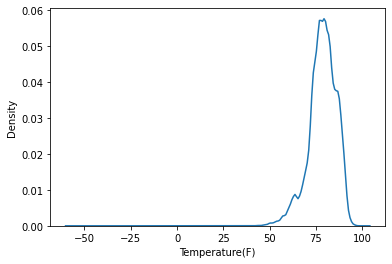

In [43]:
sns.kdeplot(miami_florida['Temperature(F)'])

In [44]:
max(miami_florida['Temperature(F)'])

102.0

In [45]:
min(miami_florida['Temperature(F)'])

-58.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


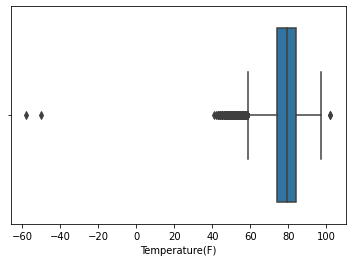

In [46]:
sns.boxplot(miami_florida['Temperature(F)'])
plt.show()

In [47]:
def remove_outlier_IQR(df):
    Q1=df['Temperature(F)'].quantile(0.25)
    Q3=df['Temperature(F)'].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df['Temperature(F)']<(Q1-1.5*IQR)) | (df['Temperature(F)']>(Q3+1.5*IQR)))]
    return df_final

In [48]:
miami_florida_outlier_rem=remove_outlier_IQR(miami_florida)
miami_florida_outlier_rem=pd.DataFrame(miami_florida_outlier_rem)

In [49]:
miami_florida_outlier_rem['Temperature(C)']=(miami_florida_outlier_rem['Temperature(F)'] - 32) * (5/9)

In [50]:
miami_florida_outlier_rem

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hour,week,Temperature(C)
31596,A-31597,2,2016-11-30 16:35:52,2016-11-30 22:35:52,25.786010,-80.258090,25.783360,-80.269110,0.710,At SR-953/42nd Ave/Le Jeune Rd - Accident.,...,False,False,False,Day,Day,Day,Day,16,2,25.611111
31660,A-31661,2,2016-11-30 18:35:52,2016-12-01 00:35:52,25.662140,-80.388600,25.652920,-80.387120,0.644,At 120th St/Exit 19 - Accident.,...,False,False,False,Night,Night,Night,Day,18,2,25.611111
31734,A-31735,2,2016-12-01 05:51:51,2016-12-01 11:51:51,25.970530,-80.165760,25.959950,-80.168700,0.753,At Ives Dairy Rd/203rd St/Exit 16 - Accident.,...,False,False,False,Night,Night,Night,Day,5,3,23.277778
31735,A-31736,3,2016-12-01 06:03:23,2016-12-01 12:03:23,25.784470,-80.293460,25.784880,-80.284440,0.562,At SR-959/Red Rd - Accident.,...,False,False,False,Night,Night,Day,Day,6,3,23.888889
31805,A-31806,2,2016-12-01 08:21:46,2016-12-01 14:21:46,25.913100,-80.210240,25.907800,-80.210230,0.366,At 151st St/Exit 11 - Accident.,...,False,False,False,Day,Day,Day,Day,8,3,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844577,A-2844578,2,2019-08-22 17:10:33,2019-08-22 17:38:17,25.707913,-80.285176,25.707640,-80.285510,0.028,At SR-959/Red Rd/57th Ave - Accident.,...,False,True,False,Day,Day,Day,Day,17,3,30.555556
2844578,A-2844579,4,2019-08-22 17:12:48,2019-08-22 17:42:07,25.909390,-80.209870,25.912360,-80.209700,0.205,Ramp closed to 151st St/Exit 11 - Road closed ...,...,False,False,False,Day,Day,Day,Day,17,3,28.333333
2844996,A-2844997,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Ramp to SR-826/Florida's Tpke/R Reagan Tpke - ...,...,False,False,False,Night,Night,Night,Night,2,4,27.222222
2845009,A-2845010,2,2019-08-23 13:08:31,2019-08-23 13:37:40,25.812250,-80.237460,25.812460,-80.243590,0.382,At SR-9/27th Ave/Unity Blvd - Accident. Right ...,...,False,False,False,Day,Day,Day,Day,13,4,30.555556


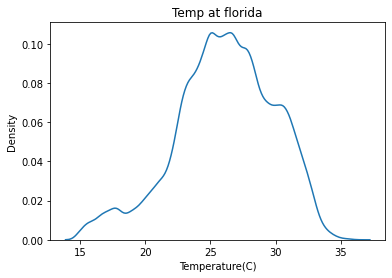

In [80]:
sns.kdeplot(miami_florida_outlier_rem['Temperature(C)'])
plt.title("Temp at florida")
plt.show()

In [52]:
#let's see what is the temperature during peak hours and peek days
temp_peak_hr = miami_florida_outlier_rem[miami_florida_outlier_rem['hour']==13]

Text(0.5, 1.0, 'Temp at peak hour at florida')

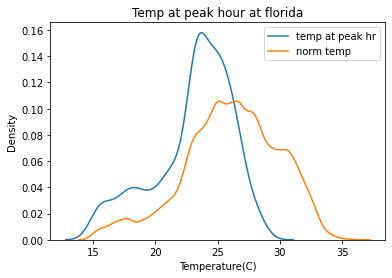

In [81]:
sns.kdeplot(temp_peak_hr['Temperature(C)'], label="temp at peak hr")
sns.kdeplot(miami_florida_outlier_rem['Temperature(C)'], label="norm temp")
plt.legend()
plt.title("Temp at peak hour at florida")

**Obs:** Accidents mostly happens at temp 20 to 30 degree celcius.

### Road Side

In [83]:
miami_florida['Side'].value_counts()

R    73977
L    32919
Name: Side, dtype: int64

Text(0, 0.5, 'accident count')

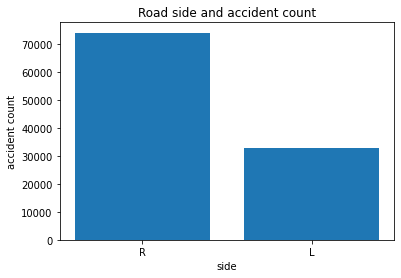

In [84]:
plt.bar(miami_florida['Side'].value_counts().keys(), miami_florida['Side'].value_counts())
plt.title("Road side and accident count")
plt.xlabel("side")
plt.ylabel("accident count")

Most of the accidents happens on right side of the road.

### Airport_Code

In [68]:
miami_florida['Airport_Code'].value_counts()

KMIA    41457
KTMB    34994
KOPF    16494
KHWO    12485
KHST     1466
Name: Airport_Code, dtype: int64

Also the "Miami International Airport" is more accident prone area.

**Wind_Chill(F)**

Text(0.5, 1.0, 'Wind Chill(f) at Florida')

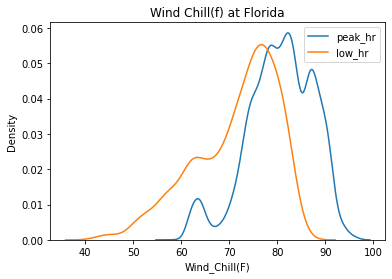

In [85]:
low_hr= miami_florida[miami_florida['hour'] ==0]
peak_hr= miami_florida[miami_florida['hour'] ==13]

sns.kdeplot(peak_hr['Wind_Chill(F)'].dropna(), label="peak_hr")
sns.kdeplot(low_hr['Wind_Chill(F)'].dropna(), label="low_hr")
plt.legend()
plt.title("Wind Chill(f) at Florida")

**Obs:** Wind Chill is more while accident.

Text(0.5, 1.0, 'Wind Chill(f) at Florida')

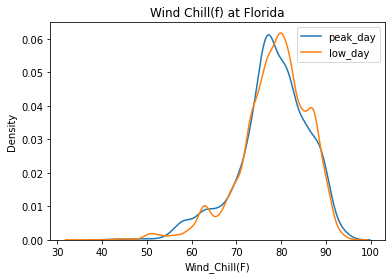

In [86]:
low_day= miami_florida[miami_florida['week'] ==2]
peak_day= miami_florida[miami_florida['week'] ==5]

sns.kdeplot(peak_day['Wind_Chill(F)'].dropna(), label="peak_day")
sns.kdeplot(low_day['Wind_Chill(F)'].dropna(), label="low_day")
plt.legend()
plt.title("Wind Chill(f) at Florida")

**Obs**: No effect of windchill

**Pressuer(in)**

Text(0.5, 1.0, 'Pressure in Miami Florida')

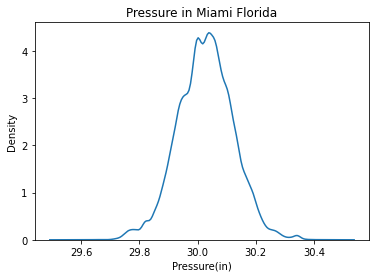

In [72]:
sns.kdeplot(miami_florida['Pressure(in)'])
plt.title("Pressure in Miami Florida")

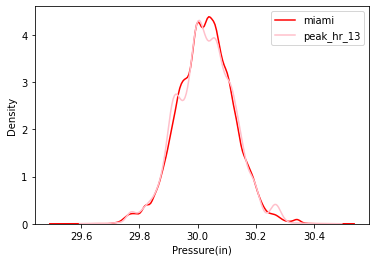

In [73]:
peak_hr= miami_florida[miami_florida['hour'] ==13]
sns.kdeplot(miami_florida['Pressure(in)'], color='red', label='miami')
sns.kdeplot(peak_hr['Pressure(in)'], color='pink', label='peak_hr_13')
plt.legend()

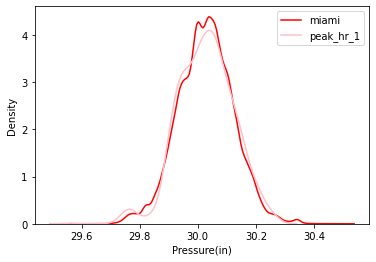

In [74]:
peak_hr= miami_florida[miami_florida['hour'] ==1]
sns.kdeplot(miami_florida['Pressure(in)'], color='red', label='miami')
sns.kdeplot(peak_hr['Pressure(in)'], color='pink', label='peak_hr_1')
plt.legend()

In [78]:
miami_florida.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'hour', 'week'],
      dtype='object')

### Visualizing boolean feature


In [107]:
bool_var=['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']

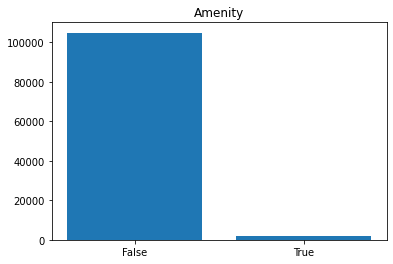

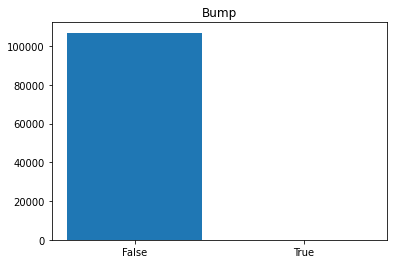

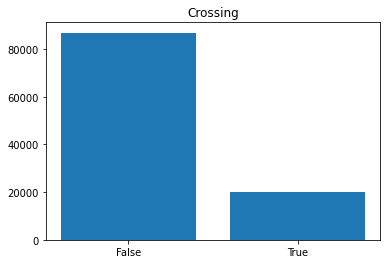

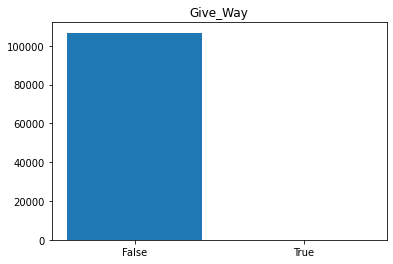

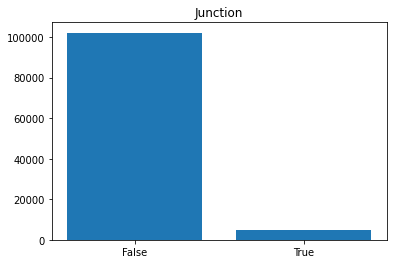

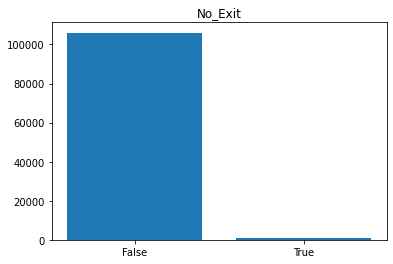

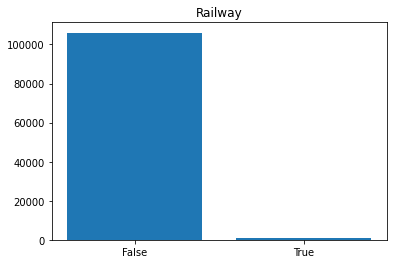

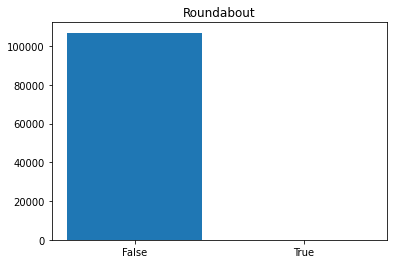

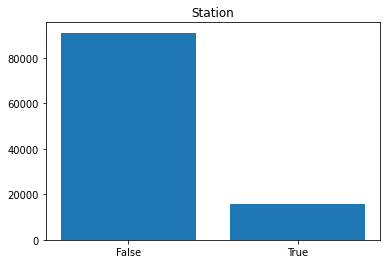

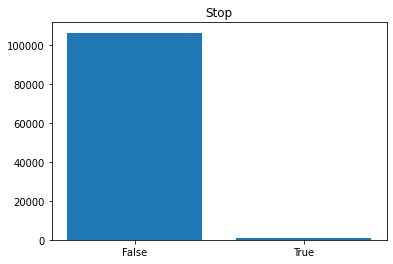

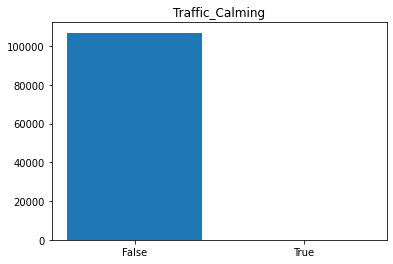

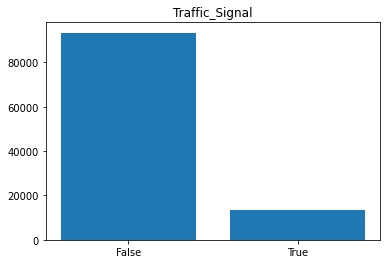

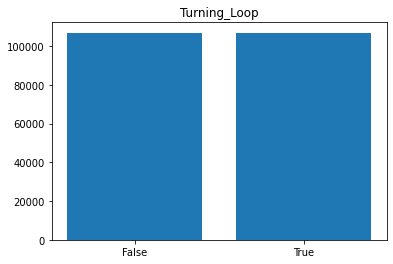

In [108]:
for i in bool_var:
  plt.bar(['False', 'True'],miami_florida[i].value_counts())
  plt.title(i)
  plt.show()

**Obs:** By looking at above graphs it seems accident might happens often because of absence of these features in the area. Like 
* "Bump" is necessary to slow the car speed. 
* Most places doesn't have traffic signal.


### visualizing twilight variable

In [109]:
list1 =[ 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

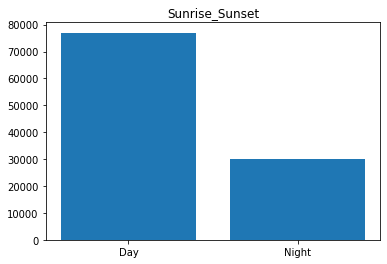

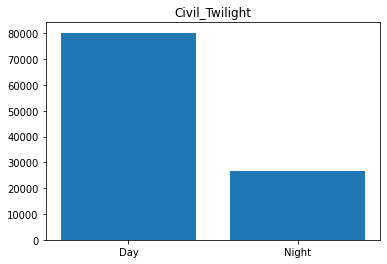

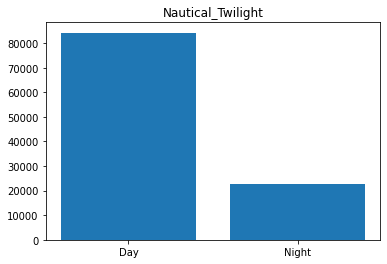

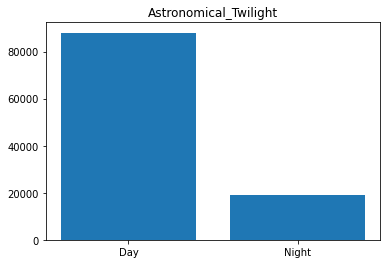

In [112]:
for i in list1:
  plt.bar(miami_florida[i].value_counts().keys(), miami_florida[i].value_counts())
  plt.title(i)
  plt.show()

**Obs:** Most of the accidents happens at day time and hence we can take good measures to lower the accident percentage in the area.

### Conclusion
* Street number has most no of missing values.
* Most of the accidents took place in right side of street.
* Miami is a city in florida, which is a 3rd most populus state in USA. That could be a reasonable reason why miami has highest no of accidents.
* population is not the reason as los angles has highest population but it is second place in cities by accident and it's accident's rate is 40,000 less than miami.
* Miami-Dade has the highest accident count in Florida state.
* CANADA ranks 1 in highest accident state in USA. And it is also the most populous state in USA.
* the "Miami International Airport" is more accident prone area.
* 2021 was the deadliest year in whole USA and in Miami also.
* Most of the accidents happens at day time and hence we can take good measures to lower the accident percentage in the area.
* 